In [221]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import os
import cPickle as pkl
import matplotlib.pyplot as plt
import glob
from pprint import pprint

%matplotlib inline

#### Load data

In [351]:
subject_num = 1
session_num = 1
data_dir = './data/'
fns = glob.glob(os.path.join(data_dir, str(subject_num) + '_' + str(session_num) + '*_block-*.csv'))
pprint(fns)

df = pd.read_csv(fns[-1])
df.head()
# with open(os.path.join(data_dir, '1_1_2018-09-05_13.15.17_outputDict.pkl'), 'r') as f:
#     dat = pkl.load(f)
# dat.keys()

['./data/1_1_2018-09-05_12.44.37_block-1.csv',
 './data/1_1_2018-09-05_12.46.29_block-1.csv',
 './data/1_1_2018-09-05_12.52.00_block-3.csv',
 './data/1_1_2018-09-05_12.55.37_block-1.csv',
 './data/1_1_2018-09-05_13.08.17_block-1.csv',
 './data/1_1_2018-09-05_13.15.17_block-1.csv',
 './data/1_1_2018-09-05_13.15.55_block-1.csv',
 './data/1_1_2018-09-05_13.31.09_block-1.csv',
 './data/1_1_2018-09-05_13.32.49_block-1.csv',
 './data/1_1_2018-09-05_13.34.11_block-1.csv',
 './data/1_1_2018-09-05_13.46.58_block-1.csv']


,TrialNumber,direction,jitter,staircase_id,stop_trial,trial_ID,block,ran,order,rt,...,iti_time,ssd,stop_signal_time_recorded,staircase_start_val,phase_0_measured,phase_1_measured,phase_2_measured,phase_3_measured,trial_t_time_block_measured,stimulus_onset_time_block_measured
0,1,0.0,3.00,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,...,13.42072,0.1,0.11701298,0.1,1.9793949,3.001745,1.00108,4.5032244,0.009094954,3.01084
1,2,1.0,3.00,0.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,0.05,0.06681919,0.05,0.49636197,3.002826,0.7180712,-18.64139,9.014915,12.017742
2,3,0.0,0.75,NaN,0.0,2.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
3,4,0.0,2.25,NaN,0.0,3.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
4,5,1.0,2.25,NaN,0.0,4.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--


### Plot staircases

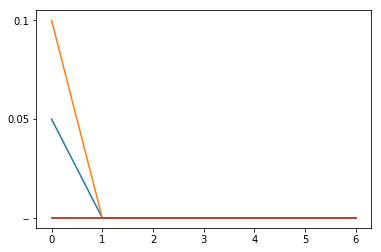

In [223]:
stop_trial_array = dat.loc[dat.stop_trial == 1]
for staircase_id in np.unique(stop_trial_array.staircase_id):
    xs = np.arange(stop_trial_array.loc[stop_trial_array.staircase_id==staircase_id, 'ssd'].shape[0])
    plt.plot(xs, stop_trial_array.loc[stop_trial_array.staircase_id==staircase_id, 'ssd'])

### Try to plot some RT dists

### Get scanner pulses (relative to block start)

In [226]:
fns = glob.glob(os.path.join(data_dir, str(subject_num) + '_' + str(session_num) + '*outputDict.pkl'))
print(fns[-1])
with open(fns[-1], 'r') as f:
    dat = pkl.load(f)
dat.keys()

./data/1_1_2018-09-05_13.47.29_outputDict.pkl


['parameterArray', 'eventArray']

In [344]:
pulses = []
for trial in dat['eventArray']:
    for event in trial:
        if isinstance(event, list):
            if event[0] == 99:
                pulses.append(event)

In [348]:
pd.DataFrame(pulses, columns=['pulse code', 'time_abs', 'time_since_session_start', 'time_since_block_start', 'trial_ID'])

,pulse code,time_abs,time_since_session_start,time_since_block_start,trial_ID
0,99,4.967626,1.605660,4.967626,0
1,99,7.967538,4.605572,7.967538,0
2,99,10.967537,7.605571,10.967537,0
3,99,13.967538,10.605572,0.000000,0
4,99,16.967538,13.605572,3.000000,0


### Get stimulus presentation (relative to block start)

In [335]:
import re
rexp_phase_starts = re.compile('trial (?P<trial_ID>-?\d+) phase (?P<phase_number>\d+) .* (?P<stimulus_start_time>\d+\.\d+)')
rexp_key_events = re.compile('trial (?P<trial_ID>-?\d+) event (?P<event_key>\S+) at (?P<event_time>\d+\.\d+)')

In [339]:
events = []
phases = []
for trial in dat['eventArray']:
    for event in trial:
        if isinstance(event, str):
            if 'phase' in event:
                phases.append(rexp_phase_starts.match(event).groupdict())
            elif 'event' in event:
                events.append(rexp_key_events.match(event).groupdict())

In [358]:
block_start_time = 13.967538
phases_df = pd.DataFrame(phases)
phases_df.stimulus_start_time = pd.to_numeric(phases_df.stimulus_start_time)
phases_df.stimulus_start_time = phases_df.stimulus_start_time - 13.967538
phases_df

,phase_number,stimulus_start_time,trial_ID
0,1,0.011108,0
1,2,3.010923,0


In [357]:
pd.DataFrame(events)

,event_key,event_time,trial_ID
0,equal,3.35139203072,-1
1,t,4.9720659256,0
2,t,7.97386598587,0
3,t,10.9758610725,0
4,t,13.9786770344,0
5,t,16.9788811207,0
6,s,17.1833670139,0
7,escape,17.76770401,0


In [352]:
df

,TrialNumber,direction,jitter,staircase_id,stop_trial,trial_ID,block,ran,order,rt,...,iti_time,ssd,stop_signal_time_recorded,staircase_start_val,phase_0_measured,phase_1_measured,phase_2_measured,phase_3_measured,trial_t_time_block_measured,stimulus_onset_time_block_measured
0,1,0.0,3.00,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,...,13.42072,0.1,0.11701298,0.1,1.9793949,3.001745,1.00108,4.5032244,0.009094954,3.01084
1,2,1.0,3.00,0.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,0.05,0.06681919,0.05,0.49636197,3.002826,0.7180712,-18.64139,9.014915,12.017742
2,3,0.0,0.75,NaN,0.0,2.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
3,4,0.0,2.25,NaN,0.0,3.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
4,5,1.0,2.25,NaN,0.0,4.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
5,6,1.0,3.00,NaN,0.0,5.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
6,7,1.0,3.00,NaN,0.0,6.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
7,8,1.0,2.25,NaN,0.0,7.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
8,9,1.0,0.75,NaN,0.0,8.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
9,10,0.0,2.25,1.0,1.0,9.0,1.0,0.0,--,--,...,--,--,--,--,--,--,--,--,--,--
